# Problem Set 9
## Sihan Zha
## Problem 1

In [30]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint as sp_randint

import matplotlib.pyplot as plt

from scipy.stats import uniform as sp_uniform

In [35]:
wine=pd.read_csv("data/strongdrink.txt")

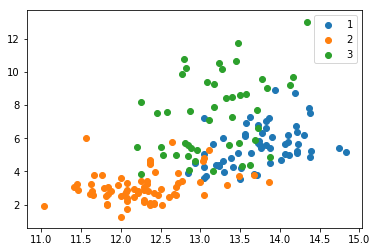

In [19]:
# (a)
fig, ax = plt.subplots()

for i in range(1,4):
    data = wine[wine["cultivar"]==i]
    ax.scatter(wine[wine["cultivar"]==i].alco, wine[wine["cultivar"]==i].color_int, label = i)
    
ax.legend()
plt.show()

In [27]:
# (b) Logistic
X = wine[["alco","malic","tot_phen","color_int"]]
y = wine["cultivar"]


param_dist1 = {'penalty': ['l1','l2'],
               'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(LogisticRegression().fit(X, y), param_dist1,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                     scoring='neg_mean_squared_error')
random_search1.fit(X,y)

print('The optimal tuning parameter values are', random_search1.best_params_)
print('The MSE of the optimal results is', abs(random_search1.best_score_))

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Optimal tuning parameter values are {'C': 2.665871587495725, 'penalty': 'l1'}
MSE of the optimal results is 0.11931818181818182


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
# (c) RandomForest
param_dist2 = {'n_estimators': [10, 200],
               'max_depth': [2, 4],
               'min_samples_split': sp_randint(2, 20),
               'min_samples_leaf': sp_randint(2, 20),
               'max_features': sp_randint(1, 4)}

random_search2 = RandomizedSearchCV(RandomForestClassifier(), param_dist2, 
                                   n_iter=100, n_jobs=-1, cv=4, random_state=25, scoring='neg_mean_squared_error')

random_search2.fit(X,y)

print('The optimal tuning parameter values are', random_search2.best_params_)
print('The MSE of the optimal results is', abs(random_search2.best_score_))

The optimal tuning parameter values are {'max_depth': 4, 'max_features': 2, 'min_samples_leaf': 12, 'min_samples_split': 4, 'n_estimators': 10}
The MSE of the optimal results is 0.14204545454545456


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [34]:
# (d) SVC
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}

random_search3 = RandomizedSearchCV(SVC(kernel = 'rbf'), param_dist3, 
                                n_iter=100, n_jobs=-1, cv=4, random_state=25, scoring='neg_mean_squared_error')

random_search3.fit(X,y)

print('The optimal tuning parameter values are', random_search3.best_params_)
print('The MSE of the optimal results is', abs(random_search3.best_score_))

The optimal tuning parameter values are {'C': 1.790414563978564, 'gamma': 'scale', 'shrinking': True}
The MSE of the optimal results is 0.1534090909090909


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [33]:
# (e) MLP
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
               'activation': ['logistic', 'relu'],
               'alpha': sp_uniform(0.1, 10.0)}

random_search4 = RandomizedSearchCV(MLPClassifier(), param_dist4, 
                                n_iter=100, n_jobs=-1, cv=4, random_state=25, scoring='neg_mean_squared_error')

random_search4.fit(X,y)

print('The optimal tuning parameter values are', random_search4.best_params_)
print('The MSE of the optimal results is', abs(random_search4.best_score_))

The optimal tuning parameter values are {'activation': 'logistic', 'alpha': 0.16597664201326903, 'hidden_layer_sizes': 96}
The MSE of the optimal results is 0.21022727272727273


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(f)
The logistic model seems to be the best with lowest MSE.